<a href="https://colab.research.google.com/github/Erykka/Portofolio-Data-Analyst/blob/main/Analisis_Kinerja_Pegawai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Tugas: Analisis Kinerja Pegawai untuk Optimalisasi Produktivitas

Deskripsi:
Tugas ini bertujuan untuk menganalisis data kinerja pegawai berdasarkan berbagai metrik seperti kehadiran, produktivitas, dan kepuasan kerja. Hasil analisis akan digunakan untuk memberikan rekomendasi dalam meningkatkan performa dan efisiensi tim.


In [ ]:
#Memasukkan data ke google colabs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

df = pd.read_csv("/content/employee_performance.csv")
df.head()

,Employee ID,Departemen,Job Roles,Years of Experience,Attendance Rate,Task Completion Rate,Work Hours per Week,Customer Satisfaction Score,Performance Rating
0,EMP001,Fakultas Ilmu Komputer,Kepala Tata Usaha Fakultas Ilmu Komputer,8.9,82.6,85.7,47,3.96,2.36
1,EMP002,Fakultas Ekonomi,Kepala Tata Usaha Fakultas Ekonomi,3.5,90.6,97.0,38,4.89,3.94
2,EMP003,Fakultas Kedokteran,Kepala Tata Usaha Fakultas Kedokteran,6.1,71.7,60.9,30,3.42,2.75
3,EMP004,Fakultas Ekonomi,Kepala Tata Usaha Fakultas Ekonomi,13.8,73.8,60.5,44,4.27,4.78
4,EMP005,Perpustakaan,Pustakawan,26.2,74.6,97.5,39,4.70,3.23


Dataset:

Saya membuat dataset dummy yang mengandung variabel seperti:

Employee ID (ID Pegawai)


Departemen: Administrasi

Job Roles:

1. Staf Administrasi


Departemen: Fakultas Ekonomi

Job Roles:

1. Dosen

2. Kepala Tata Usaha Fakultas Ekonomi


Departemen: Fakultas Hukum

Job Roles:

1. Dosen

2. Kepala Tata Usaha Fakultas Hukum


Departemen: Fakultas Ilmu Komputer
Job Roles:

1. Dosen

2. Kepala Tata Usaha Fakultas Ilmu Komputer

Departemen: Fakultas Kedokteran

Job Roles:

1. Dosen

2. Kepala Tata Usaha Fakultas Kedokteran

Departemen: Fakultas Teknik

Job Roles:

1. Dosen

2. Kepala Tata Usaha Fakultas Teknik

Departemen: Humas

Job Roles:

1. Staf Administrasi

Departemen: IT

Job Roles:

1. Tenaga Kependidikan

Departemen: Keuangan

Job Roles:

1. Tenaga Kependidikan

Departemen: Perpustakaan

Job Roles:

1. Pustakawan

Years of Experience (Lama bekerja)

Attendance Rate (Persentase kehadiran)

Task Completion Rate (Persentase tugas selesai)

Work Hours per Week (Jam kerja per minggu)

Customer Satisfaction Score (Skor kepuasan pelanggan, jika relevan)

Performance Rating (Skor kinerja dari atasan)


# Tahapan Tugas:
1. Data Cleaning & Preprocessing

Mengidentifikasi dan menangani missing values serta outlier

In [ ]:
# 1. Cek Missing Values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Employee ID                    0
Departemen                     0
Job Roles                      0
Years of Experience            0
Attendance Rate                0
Task Completion Rate           0
Work Hours per Week            0
Customer Satisfaction Score    0
Performance Rating             0
dtype: int64


In [ ]:
# 2. Cek Outliers
# Cek outlier menggunakan metode IQR
Q1 = df.select_dtypes(include=['number']).quantile(0.25)
Q3 = df.select_dtypes(include=['number']).quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Pastikan ukuran dataframe sejajar sebelum perbandingan
df_numeric = df.select_dtypes(include=['number'])  # Hanya kolom numerik

# Menemukan jumlah outlier per kolom
outliers = ((df_numeric < lower_bound) | (df_numeric > upper_bound)).sum()

print("\nOutliers:\n", outliers)


Outliers:
 Years of Experience            0
Attendance Rate                0
Task Completion Rate           0
Work Hours per Week            0
Customer Satisfaction Score    0
Performance Rating             0
dtype: int64


In [ ]:
# Menampilkan daftar job role untuk setiap departemen
department_job_roles = df.groupby('Departemen')['Job Roles'].unique()

# Menampilkan hasil
for department, job_roles in department_job_roles.items():
    print(f"Departemen: {department}")
    print(f"Job Roles: {', '.join(job_roles)}\n")


Departemen: Administrasi
Job Roles: Staf Administrasi

Departemen: Fakultas Ekonomi
Job Roles: Kepala Tata Usaha Fakultas Ekonomi, Dosen

Departemen: Fakultas Hukum
Job Roles: Kepala Tata Usaha Fakultas Hukum, Dosen

Departemen: Fakultas Ilmu Komputer
Job Roles: Kepala Tata Usaha Fakultas Ilmu Komputer, Dosen

Departemen: Fakultas Kedokteran
Job Roles: Kepala Tata Usaha Fakultas Kedokteran, Dosen

Departemen: Fakultas Teknik
Job Roles: Kepala Tata Usaha Fakultas Teknik, Dosen

Departemen: Humas
Job Roles: Staf Administrasi

Departemen: IT
Job Roles: Tenaga Kependidikan

Departemen: Keuangan
Job Roles: Tenaga Kependidikan

Departemen: Perpustakaan
Job Roles: Pustakawan



2. Exploratory Data Analysis (EDA)

  Analisis distribusi kinerja pegawai berdasarkan departemen dan jabatan.
Identifikasi hubungan antara kehadiran, jam kerja, dan performa kerja.
Analisis faktor utama yang mempengaruhi kepuasan kerja.
Korelasi antara pengalaman kerja dan performa.

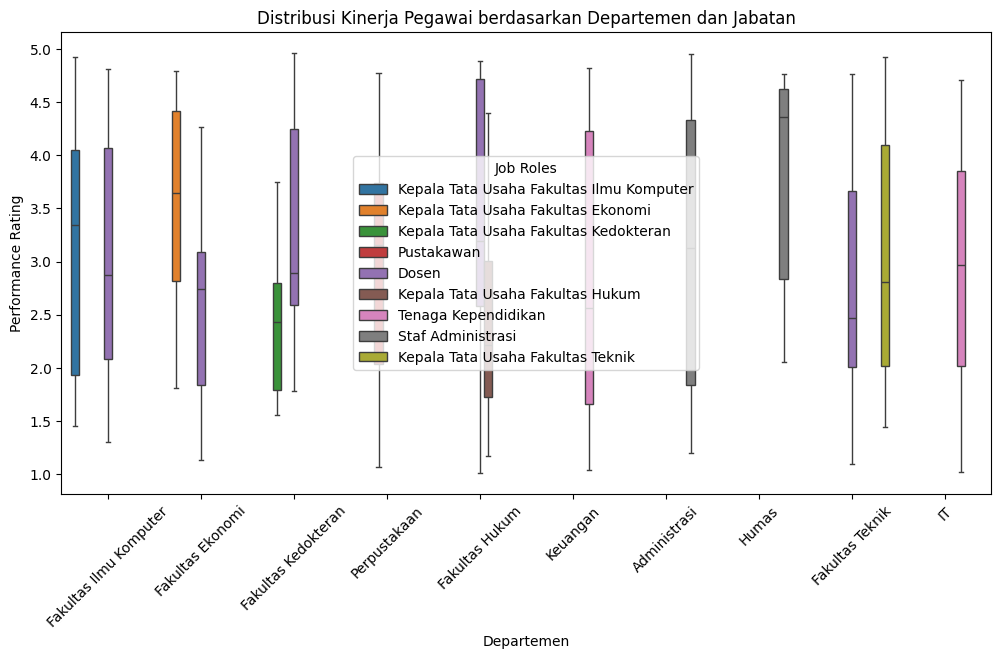

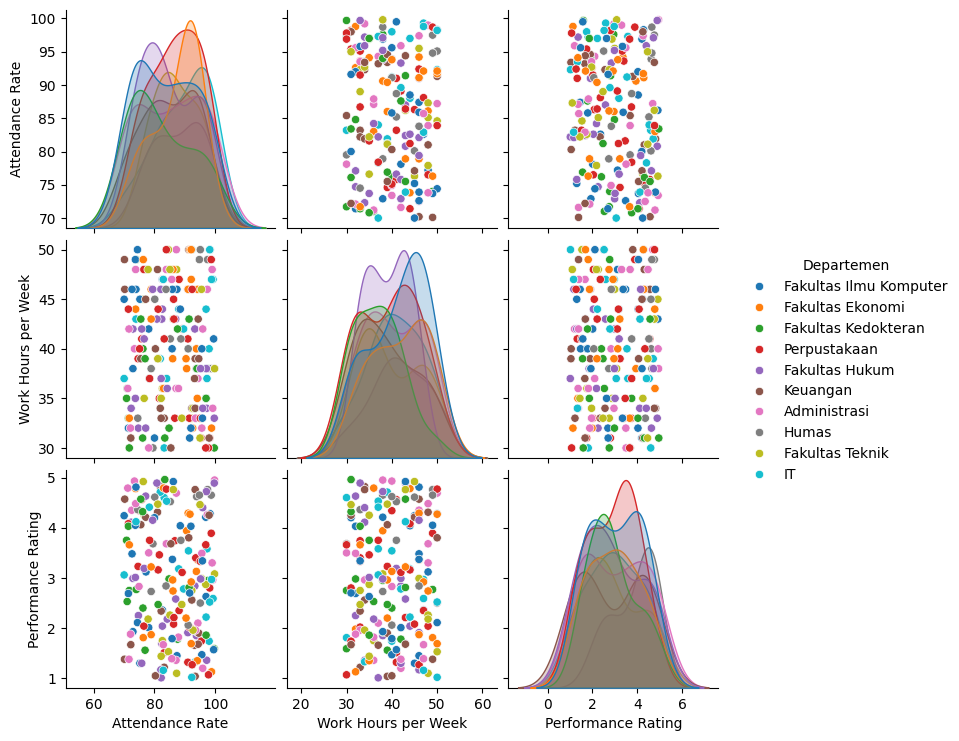

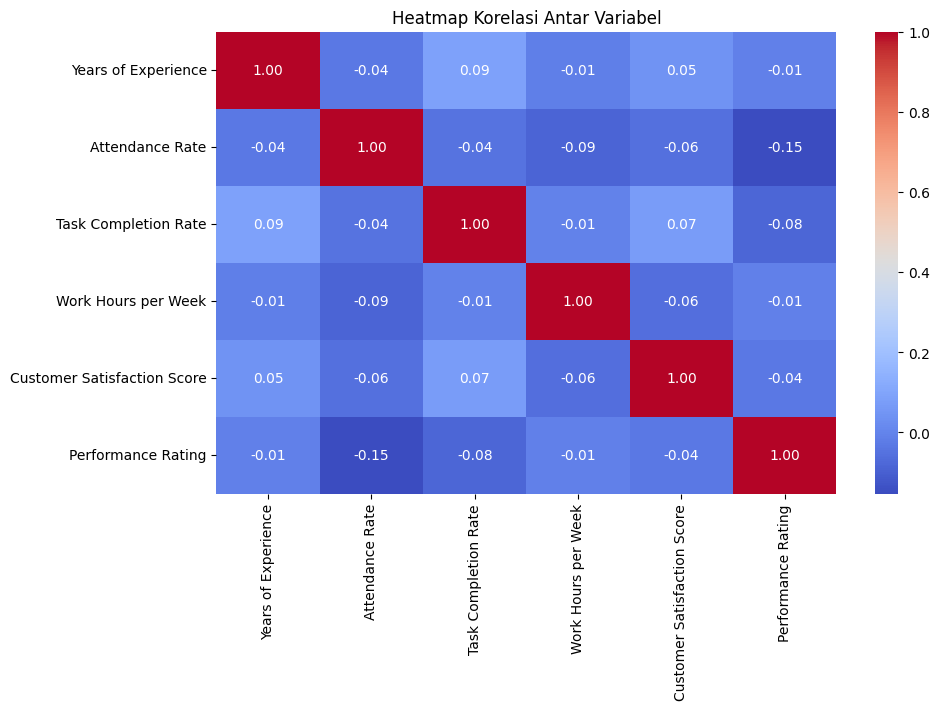

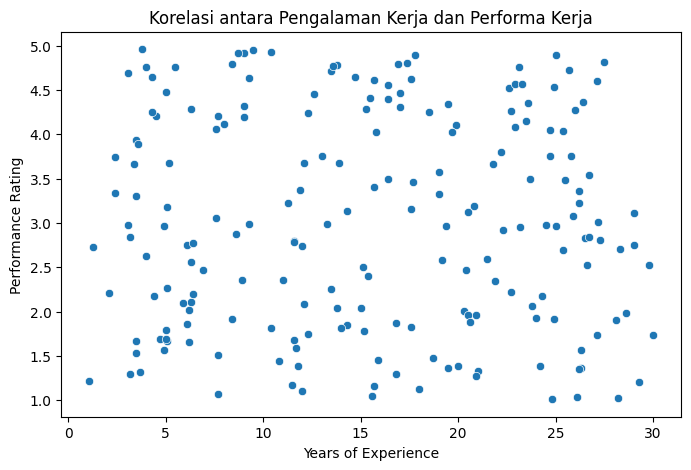

Korelasi antara Pengalaman Kerja dan Performa Kerja: -0.01


In [ ]:
# Distribusi kinerja berdasarkan departemen dan jabatan
plt.figure(figsize=(12, 6))
sns.boxplot(x="Departemen", y="Performance Rating", hue="Job Roles", data=df)
plt.xticks(rotation=45)
plt.title("Distribusi Kinerja Pegawai berdasarkan Departemen dan Jabatan")
plt.show()

# Korelasi antara kehadiran, jam kerja, dan performa kerja
sns.pairplot(df, vars=["Attendance Rate", "Work Hours per Week", "Performance Rating"], hue="Departemen")
plt.show()

# Analisis faktor utama yang mempengaruhi kepuasan kerja
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

# Korelasi antara pengalaman kerja dan performa kerja
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Years of Experience", y="Performance Rating", data=df)
plt.title("Korelasi antara Pengalaman Kerja dan Performa Kerja")
plt.show()

correlation_experience_performance = df["Years of Experience"].corr(df["Performance Rating"])
print(f"Korelasi antara Pengalaman Kerja dan Performa Kerja: {correlation_experience_performance:.2f}")

3. Prediksi Kinerja Pegawai dengan Machine Learning (2 Model)

1. Regresi menggunakan Random Forest Regressor untuk memprediksi Performance Rating



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Pilih fitur yang relevan
features = ["Years of Experience", "Attendance Rate", "Task Completion Rate", "Work Hours per Week", "Customer Satisfaction Score"]
target = "Performance Rating"

X = df[features]
y = df[target]

# Bagi data menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Latih model
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 1.0748475000000002
R-squared (R²): -0.18492949711418727


Analisis Model

Mean Absolute Error (MAE) → Semakin kecil, semakin baik model dalam memprediksi nilai performa.

R-squared (R²) → Semakin mendekati 1, semakin baik model dalam menjelaskan variasi data.


Model lain jika dirasa masih kurang akurat bisa menggunakan:

✅ Model lain seperti Gradient Boosting atau XGBoost.

✅ Menambahkan fitur baru seperti jenis pekerjaan atau lingkungan kerja.

✅ Melakukan Feature Engineering untuk memperbaiki kualitas prediksi.

2.Klasifikasi menggunakan Random Forest Classifier untuk mengelompokkan pegawai ke dalam kategori seperti "Performa Baik" vs "Performa Buruk


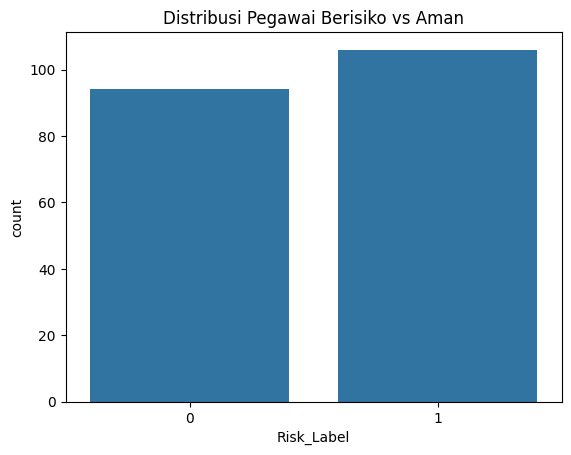

Akurasi Model: 0.4883720930232558
              precision    recall  f1-score   support

           0       0.45      0.50      0.48        20
           1       0.52      0.48      0.50        23

    accuracy                           0.49        43
   macro avg       0.49      0.49      0.49        43
weighted avg       0.49      0.49      0.49        43



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Menghapus kolom non-prediktif
df_cleaned = df.drop(columns=["Employee ID"])

# Encoding fitur kategorikal
label_encoders = {}
for col in ["Departemen", "Job Roles"]:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Membuat label klasifikasi (1 = Berisiko, 0 = Aman)
df_cleaned["Risk_Label"] = (df_cleaned["Performance Rating"] < 3).astype(int)
X = df_cleaned.drop(columns=["Performance Rating", "Risk_Label"])
y = df_cleaned["Risk_Label"]

# Cek distribusi label
sns.countplot(x=y)
plt.title("Distribusi Pegawai Berisiko vs Aman")
plt.show()

# Mengatasi ketidakseimbangan data dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Model terbaik
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Akurasi Model:", accuracy)
print(report)


4. Segmentasi Pegawai dengan Clustering

Menggunakan K-Means atau DBSCAN untuk mengelompokkan pegawai berdasarkan pola kerja dan produktivitas. Dari olahan data tersebut dapat diidentifikasi kelompok pegawai yang memiliki performa tinggi, menengah, dan rendah.

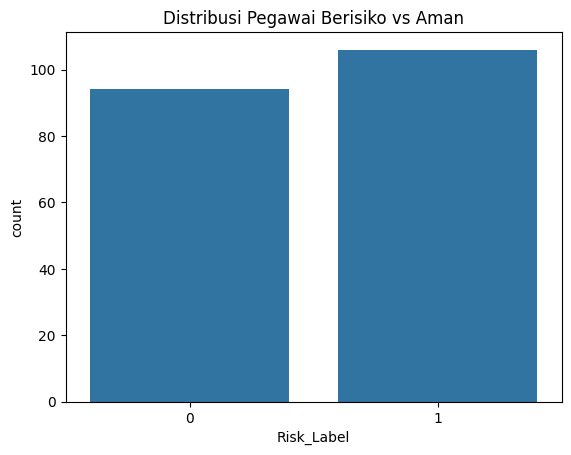

Akurasi Model: 0.4883720930232558
              precision    recall  f1-score   support

           0       0.45      0.50      0.48        20
           1       0.52      0.48      0.50        23

    accuracy                           0.49        43
   macro avg       0.49      0.49      0.49        43
weighted avg       0.49      0.49      0.49        43



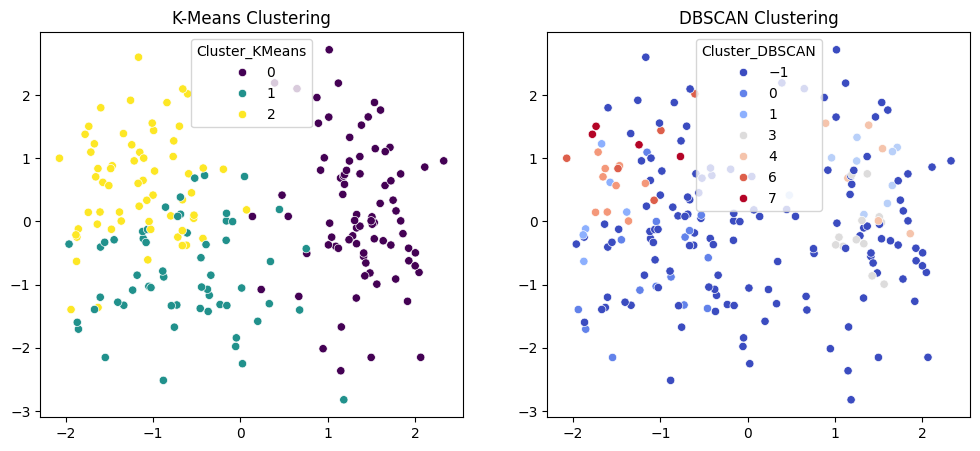

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

# Menghapus kolom non-prediktif
df_cleaned = df.drop(columns=["Employee ID"])

# Encoding fitur kategorikal
label_encoders = {}
for col in ["Departemen", "Job Roles"]:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Membuat label klasifikasi (1 = Berisiko, 0 = Aman)
df_cleaned["Risk_Label"] = (df_cleaned["Performance Rating"] < 3).astype(int)
X = df_cleaned.drop(columns=["Performance Rating", "Risk_Label"])
y = df_cleaned["Risk_Label"]

# Cek distribusi label
sns.countplot(x=y)
plt.title("Distribusi Pegawai Berisiko vs Aman")
plt.show()

# Mengatasi ketidakseimbangan data dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Model terbaik
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Akurasi Model:", accuracy)
print(report)

# Standarisasi data untuk clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned["Cluster_KMeans"] = kmeans.fit_predict(X_scaled)

# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
df_cleaned["Cluster_DBSCAN"] = dbscan.fit_predict(X_scaled)

# Visualisasi hasil clustering dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_cleaned["Cluster_KMeans"], palette="viridis")
plt.title("K-Means Clustering")

plt.subplot(1,2,2)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_cleaned["Cluster_DBSCAN"], palette="coolwarm")
plt.title("DBSCAN Clustering")
plt.show()


5. Insight & Business Recommendation


In [ ]:
# Analisis pola untuk meningkatkan produktivitas
grouped = df_cleaned.groupby("Cluster_KMeans").mean()
print("Pola berdasarkan cluster:")
print(grouped)

# Rekomendasi strategi berdasarkan cluster
strategies = {
    0: "Berikan pelatihan tambahan dan mentoring untuk meningkatkan produktivitas.",
    1: "Tingkatkan keterlibatan pegawai dengan feedback reguler dan insentif.",
    2: "Identifikasi pemimpin tim potensial dan berikan lebih banyak tanggung jawab."
}

for cluster, strategy in strategies.items():
    print(f"Strategi untuk Cluster {cluster}: {strategy}")

Pola berdasarkan cluster:
                Departemen  Job Roles  Years of Experience  Attendance Rate  \
Cluster_KMeans                                                                
0                 7.587500   7.037500            15.350000        87.046250   
1                 2.310345   2.844828            13.615517        91.768966   
2                 2.322581   2.258065            17.429032        78.593548   

                Task Completion Rate  Work Hours per Week  \
Cluster_KMeans                                              
0                          80.817500            39.862500   
1                          74.443103            38.948276   
2                          83.830645            41.080645   

                Customer Satisfaction Score  Performance Rating  Risk_Label  \
Cluster_KMeans                                                                
0                                  3.997875            3.029875    0.487500   
1                                  

Saran untuk alokasi sumber daya dan pelatihan karyawan berdasarkan data.

In [ ]:
# Rekomendasi alokasi sumber daya dan pelatihan berdasarkan cluster
resource_allocation = {
    0: "Fokuskan sumber daya pada pelatihan keterampilan teknis dan soft skills bagi pegawai dengan kinerja rendah.",
    1: "Berikan program kesejahteraan karyawan dan pelatihan leadership untuk meningkatkan kepuasan kerja.",
    2: "Alokasikan pegawai berkinerja tinggi ke proyek strategis dan program akselerasi karier."
}

for cluster, allocation in resource_allocation.items():
    print(f"Alokasi sumber daya untuk Cluster {cluster}: {allocation}")

Alokasi sumber daya untuk Cluster 0: Fokuskan sumber daya pada pelatihan keterampilan teknis dan soft skills bagi pegawai dengan kinerja rendah.
Alokasi sumber daya untuk Cluster 1: Berikan program kesejahteraan karyawan dan pelatihan leadership untuk meningkatkan kepuasan kerja.
Alokasi sumber daya untuk Cluster 2: Alokasikan pegawai berkinerja tinggi ke proyek strategis dan program akselerasi karier.


Output:

Notebook Jupyter atau Google Colab dengan analisis, visualisasi, dan model prediksi

Laporan singkat (PDF/PowerPoint) berisi insight utama dan rekomendasi HR.

Dashboard (Opsional, menggunakan Tableau atau Power BI) untuk memvisualisasikan data kinerja pegawai.

In [ ]:
df_cleaned.to_csv("employee_performance_cleaned.csv", index=False)